# Credit Card Fraud Detection


1. Data preprocessing
2. Feature Engineering
3. Modeling 
4. Evaluation
5. Deployment

#### Goal: 

Develop a machine learning model to accurately detect fraudulent credit card transactions, minimizing both false positives and false negatives.

# Imports

In [1]:

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# Data visualization
import plotly
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt
from IPython.display import SVG


In [2]:
df = pd.read_csv('your_file_path')

# About Dataset

In [3]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# # of rows and columns
df.shape

(284807, 31)

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

# Initial Cleaning

In [8]:

# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(df.duplicated().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
1081


In [9]:
# LEAVE THIS CELL
# NO MISSING VALUES

#   Drop rows with any missing values
#  data = data.dropna()
#   from sklearn.impute import SimpleImputer

# Impute missing values with the median (or mean, mode, etc.)
#  imputer = SimpleImputer(strategy='median')
#  df['Time'] = imputer.fit_transform(df['Time'].values.reshape(-1, 1))


# EDA

In [10]:
#  function to convert binary "Class" column into string

def convert_binary_to_string(num):
    if num == 0:
        return 'Normal'
    else: 
        return 'Fraud'
    # copy the data and apply convert 
df_tmp = df.copy()
df_tmp['Class'] = df_tmp['Class'].apply(convert_binary_to_string)




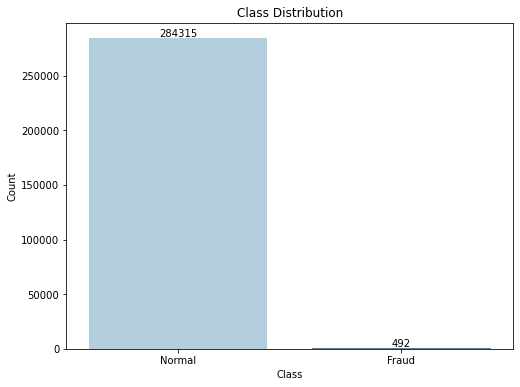

In [11]:


# Figure size
plt.figure(figsize=(8, 6))

# Bar plot with counts on bars and different colors
ax = sns.countplot(data=df_tmp, x='Class', palette='Blues')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')

# Adding counts on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.grid(False)
plt.show()

# del df_tmp




In [12]:
# delete the temporary files

del df_tmp

In [13]:
# so it is completely imbalanced data

# Splitting Data 

In [14]:
# Separate the dataset into features (X) and target variable (Y)
X = df.drop(['Class'], axis=1)  # Features: all columns except 'Class'
Y = df['Class']  # Target: 'Class' column

# Import necessary modules for cross-validation
from sklearn.model_selection import KFold, StratifiedKFold

# Initialize StratifiedKFold for cross-validation
# StratifiedKFold ensures that each fold of the cross-validation process has the same proportion of each class
strat_kfold = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# Split the data using StratifiedKFold and iterate through each fold
for train_index, test_index in strat_kfold.split(X, Y):
    print("Train Indices:", train_index, "Test Indices:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  # Extract training and testing features
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]  # Extract training and testing labels



Train Indices: [ 30473  30496  31002 ... 284804 284805 284806] Test Indices: [    0     1     2 ... 57017 57018 57019]
Train Indices: [     0      1      2 ... 284804 284805 284806] Test Indices: [ 30473  30496  31002 ... 113964 113965 113966]
Train Indices: [     0      1      2 ... 284804 284805 284806] Test Indices: [ 81609  82400  83053 ... 170946 170947 170948]
Train Indices: [     0      1      2 ... 284804 284805 284806] Test Indices: [150654 150660 150661 ... 227866 227867 227868]
Train Indices: [     0      1      2 ... 227866 227867 227868] Test Indices: [212516 212644 213092 ... 284804 284805 284806]


In [15]:

# Convert the training and testing datasets to NumPy arrays
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values

# Calculate the unique class labels and their respective counts in the training and testing sets
unique_train_labels, train_label_counts = np.unique(Y_train, return_counts=True)
unique_test_labels, test_label_counts = np.unique(Y_test, return_counts=True)

# Print the distribution of classes in the training and testing datasets
print('-' * 100)
print('Class Distribution: \n')
print('-' * 100)
print(train_label_counts / len(Y_train))  # Proportion of each class in the training set
print('-' * 100)
print(test_label_counts / len(Y_test))  # Proportion of each class in the testing set

----------------------------------------------------------------------------------------------------
Class Distribution: 

----------------------------------------------------------------------------------------------------
[0.99827076 0.00172924]
----------------------------------------------------------------------------------------------------
[0.99827952 0.00172048]


# Balancing train dataset

 Perform undersampling to balance the dataset for a binary classification problem, where the goal is to detect fraudulent transactions (Class = 1) versus non-fraudulent transactions (Class = 0).

In [16]:
# Randomly shuffle the entire dataset
df_shuffled = df.sample(frac=1)

# Determine the number of fraudulent transactions
num_fraud = len(df_shuffled[df_shuffled['Class'] == 1])

# Extract all rows corresponding to fraudulent transactions
fraud_data = df_shuffled.loc[df_shuffled['Class'] == 1]

# Extract a subset of non-fraudulent transactions equal in size to the number of fraudulent transactions
# This is done to balance the dataset by randomly selecting the same number of non-fraudulent transactions
non_fraud_data = df_shuffled.loc[df_shuffled['Class'] == 0][:num_fraud]

# Combine the fraudulent and the randomly selected non-fraudulent transactions to form a new balanced dataset
balanced_data = pd.concat([fraud_data, non_fraud_data])

# Shuffle the new balanced dataset to ensure a random order
balanced_data = balanced_data.sample(frac=1, random_state=42)

# Display the first few rows of the new balanced dataset
balanced_data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3688,3150.0,1.313281,-0.257923,0.118463,-0.735557,-0.569308,-0.733577,-0.138659,-0.141641,1.708019,...,-0.082467,0.126066,-0.223157,-0.074977,0.921940,-0.528283,0.064476,0.013132,0.00,0
150692,93904.0,-11.320633,7.191950,-13.179083,9.099552,-10.094749,-2.440115,-14.184337,4.452503,-6.241960,...,1.082235,-0.350563,0.483044,0.661133,-0.396522,-0.413315,-0.997548,-0.235036,37.93,1
81267,58858.0,-0.382477,1.155966,1.289864,0.002721,0.310885,-0.496784,0.689977,0.011249,-0.544425,...,-0.226002,-0.495439,-0.001501,0.049605,-0.201436,0.098393,0.269117,0.096874,0.99,0
189878,128595.0,-5.313774,2.664274,-4.250707,0.394707,-0.391383,0.683526,-5.133671,-7.907790,0.215475,...,8.664662,-2.716383,0.483559,0.079235,0.311065,0.555544,0.176740,0.362907,1.00,1
195383,131024.0,0.469750,-1.237555,-1.767341,4.833490,-0.268715,-0.512760,1.140149,-0.341273,-1.046351,...,0.303905,-0.647075,-0.373014,0.260801,-0.496566,-0.245973,-0.117858,0.144774,723.21,1


In [17]:
# check if it balanced now
class_counts = balanced_data['Class'].value_counts()
print(class_counts)

0    492
1    492
Name: Class, dtype: int64


 MORE EDA

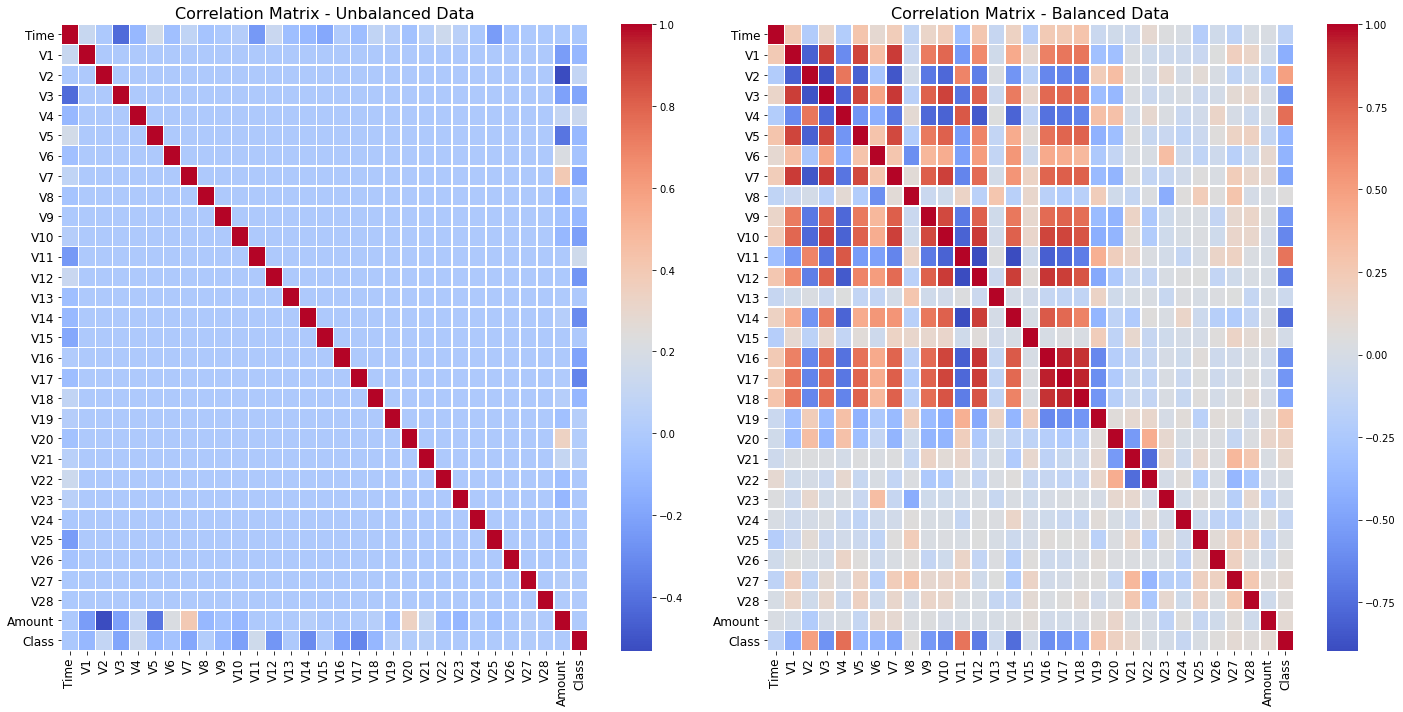

In [18]:
# Calculate the correlation matrix for both the unbalanced and balanced datasets
correlation_unbalanced = df.corr()  # Correlation matrix for the unbalanced dataset
correlation_balanced = balanced_data.corr()  # Correlation matrix for the balanced dataset

# Set up the figure with two subplots
plt.figure(figsize=(20, 10))

# Plot the correlation matrix for the unbalanced dataset without annotations
plt.subplot(1, 2, 1)
sns.heatmap(correlation_unbalanced, annot=False, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix - Unbalanced Data", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot the correlation matrix for the balanced dataset without annotations
plt.subplot(1, 2, 2)
sns.heatmap(correlation_balanced, annot=False, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix - Balanced Data", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


# Dealing with Outliers

PROCESSING WITH V3 

In [19]:
# Extract the values of V3 for fraudulent transactions
v3_fraud = balanced_data['V3'].loc[balanced_data['Class'] == 1].values

# Calculate the 25th and 75th percentiles (Q1 and Q3) for V3
q25, q75 = np.percentile(v3_fraud, 25), np.percentile(v3_fraud, 75)

# Compute the Interquartile Range (IQR) for V3
v3_iqr = q75 - q25

# Define the cutoff for identifying outliers, using 1.5 times the IQR
v3_cut_off = v3_iqr * 1.5
v3_lower, v3_upper = q25 - v3_cut_off, q75 + v3_cut_off

# Identify the outliers in V3 based on the calculated cutoff
outliers = [x for x in v3_fraud if x < v3_lower or x > v3_upper]

# Remove the outliers from the dataset for V3
balanced_data = balanced_data.drop(balanced_data[(balanced_data['V3'] > v3_upper) | (balanced_data['V3'] < v3_lower)].index)


PROCESSING WITH V10

In [20]:
# Extract the values of V10 for fraudulent transactions
v10_fraud = balanced_data['V10'].loc[balanced_data['Class'] == 1].values

# Calculate the 25th and 75th percentiles (Q1 and Q3) for V10
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)

# Compute the Interquartile Range (IQR) for V10
v10_iqr = q75 - q25

# Define the cutoff for identifying outliers, using 1.5 times the IQR
v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off

# Identify the outliers in V10 based on the calculated cutoff
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]

# Remove the outliers from the dataset for V10
balanced_data = balanced_data.drop(balanced_data[(balanced_data['V10'] > v10_upper) | (balanced_data['V10'] < v10_lower)].index)


PROCESSING WITH V12

In [21]:
# Extract the values of V14 for fraudulent transactions
v14_fraud = balanced_data['V14'].loc[balanced_data['Class'] == 1].values

# Calculate the 25th and 75th percentiles (Q1 and Q3) for V14
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)

# Compute the Interquartile Range (IQR) for V14
v14_iqr = q75 - q25

# Define the cutoff for identifying outliers, using 1.5 times the IQR
v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off

# Identify the outliers in V14 based on the calculated cutoff
outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]

# Remove the outliers from the dataset for V14
balanced_data = balanced_data.drop(balanced_data[(balanced_data['V14'] > v14_upper) | (balanced_data['V14'] < v14_lower)].index)


In [22]:
balanced_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3688,3150.0,1.313281,-0.257923,0.118463,-0.735557,-0.569308,-0.733577,-0.138659,-0.141641,1.708019,...,-0.082467,0.126066,-0.223157,-0.074977,0.921940,-0.528283,0.064476,0.013132,0.00,0
81267,58858.0,-0.382477,1.155966,1.289864,0.002721,0.310885,-0.496784,0.689977,0.011249,-0.544425,...,-0.226002,-0.495439,-0.001501,0.049605,-0.201436,0.098393,0.269117,0.096874,0.99,0
189878,128595.0,-5.313774,2.664274,-4.250707,0.394707,-0.391383,0.683526,-5.133671,-7.907790,0.215475,...,8.664662,-2.716383,0.483559,0.079235,0.311065,0.555544,0.176740,0.362907,1.00,1
195383,131024.0,0.469750,-1.237555,-1.767341,4.833490,-0.268715,-0.512760,1.140149,-0.341273,-1.046351,...,0.303905,-0.647075,-0.373014,0.260801,-0.496566,-0.245973,-0.117858,0.144774,723.21,1
241729,151157.0,-1.468624,1.259457,0.600875,-0.303944,0.274097,-1.891306,0.939496,0.012538,-0.784578,...,0.319238,0.774139,-0.612486,0.902723,0.942291,-0.051773,-0.167594,-0.076190,29.52,0


CHECKING...BOXPLOTS

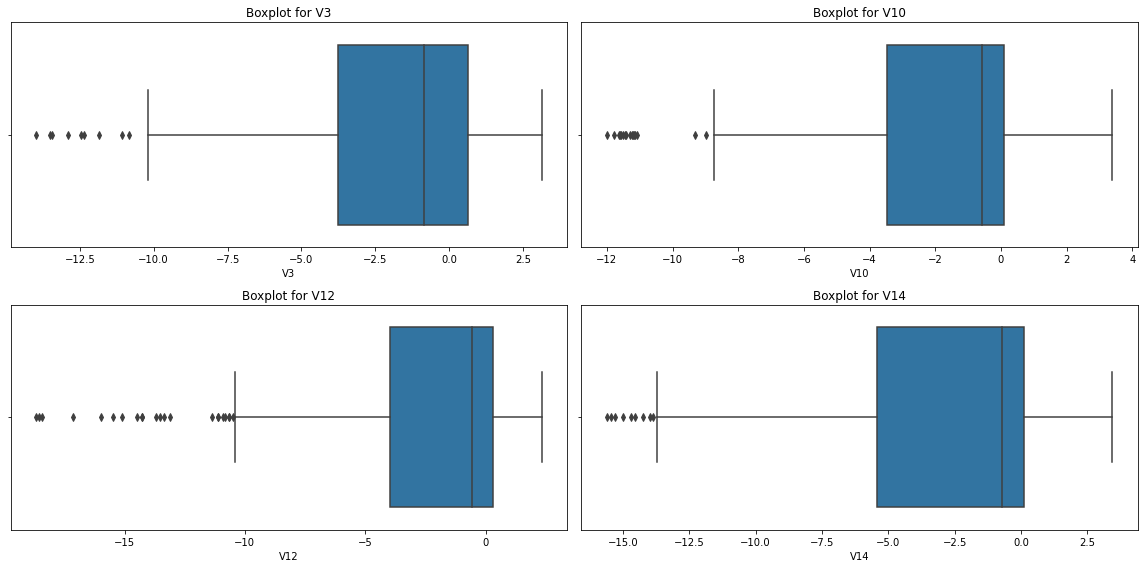

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for the variables to check for remaining outliers
plt.figure(figsize=(16, 8))

# Boxplot for V3
plt.subplot(2, 2, 1)
sns.boxplot(x=balanced_data['V3'])
plt.title('Boxplot for V3')

# Boxplot for V10
plt.subplot(2, 2, 2)
sns.boxplot(x=balanced_data['V10'])
plt.title('Boxplot for V10')

# Boxplot for V12
plt.subplot(2, 2, 3)
sns.boxplot(x=balanced_data['V12'])
plt.title('Boxplot for V12')

# Boxplot for V14
plt.subplot(2, 2, 4)
sns.boxplot(x=balanced_data['V14'])
plt.title('Boxplot for V14')

plt.tight_layout()
plt.show()


# Splitting data

In [24]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets

# The train_test_split function is used to split the feature matrix (X) and the target vector (Y) 
# into training and testing subsets. This is a crucial step in model evaluation, allowing us to 
# train the model on one subset (training data) and evaluate its performance on a separate subset 
# (testing data) that the model hasn't seen before.

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=42)

# Parameters:
# X: Feature matrix containing the independent variables.
# Y: Target vector containing the dependent variable (Class labels - fraudulent or non-fraudulent).
# test_size=0.2: Specifies that 20% of the data will be used for testing, and the remaining 80% for training.
# random_state=42: Ensures that the data is split in the same way every time the code is run, allowing for reproducibility.

# Outputs:
# X_train: Training data for the features (80% of X).
# X_test: Testing data for the features (20% of X).
# y_train: Training data for the target variable (80% of Y).
# y_test: Testing data for the target variable (20% of Y).


So, we have many features correlated, meaning high dimensionality. It is better use dimensionality reduction techniques for noise reduction, avoiding overfitting (too complex model performance).

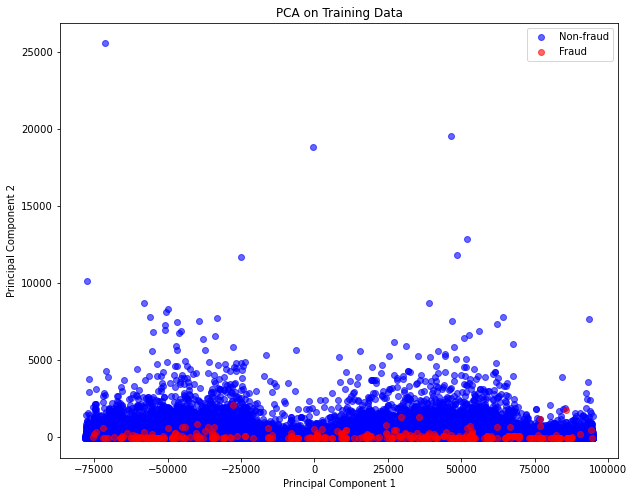

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to the training data
pca = PCA(n_components=2, random_state=42)
X_train_reduced_pca = pca.fit_transform(X_train)

# Transform the testing data using the same PCA model
X_test_reduced_pca = pca.transform(X_test)


# Visualize the reduced training data
plt.figure(figsize=(10, 8))
plt.scatter(X_train_reduced_pca[y_train == 0, 0], X_train_reduced_pca[y_train == 0, 1], c='blue', label='Non-fraud', alpha=0.6)
plt.scatter(X_train_reduced_pca[y_train == 1, 0], X_train_reduced_pca[y_train == 1, 1], c='red', label='Fraud', alpha=0.6)
plt.title('PCA on Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


# BASELINE MODELS 

In [26]:
!pip install tensorflow --user



In [27]:
import tensorflow as tf

# Check TensorFlow version
print(tf.__version__)


2.13.0


### Deep Learning imports 

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, LSTM, Embedding, Reshape
from sklearn.model_selection import KFold
import numpy as np


a. Basic Neural Network

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_basic_nn(input_shape):
    model = Sequential()
    
    # First Dense layer with ReLU activation
    model.add(Dense(128, activation='relu', input_shape=input_shape))
    model.add(Dropout(0.5))
    
    # Second Dense layer
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    
    # Output layer with sigmoid activation for binary classification
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model


c. Recurrent Neural Network (RNN)

In [30]:

def create_rnn(input_shape):
    model = Sequential()
    
    # Reshape the input data for RNN (LSTM) layers
    model.add(Reshape((input_shape, 1), input_shape=(input_shape,)))  # Reshape for RNN
    
    # First LSTM layer with ReLU activation
    model.add(LSTM(128, return_sequences=True, activation='relu'))
    model.add(Dropout(0.2))
    
    # Second LSTM layer with ReLU activation
    model.add(LSTM(64, activation='relu'))
    
    # Output layer with Sigmoid activation for binary classification
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model



## Cross-validation for DL models



<font size="4">Since deep learning models don’t work directly with cross_val_score, we'll manually implement cross-validation for each model.</font>

In [31]:
def cross_validate_dl_model(create_model_function, X_train, Y_train, n_splits=5, epochs=10, batch_size=32):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    fold_accuracies = []

    input_shape = (X_train.shape[1],)  # Ensure input_shape is a tuple with a single integer

    for train_index, val_index in kfold.split(X_train):
        # Convert to NumPy arrays if not already
        X_train_fold, X_val_fold = X_train.iloc[train_index].values, X_train.iloc[val_index].values
        Y_train_fold, Y_val_fold = Y_train.iloc[train_index].values, Y_train.iloc[val_index].values
        
        # Create and compile the model with input shape
        model = create_model_function(input_shape=input_shape)
        
        # Fit the model on the training data
        model.fit(X_train_fold, Y_train_fold, epochs=epochs, batch_size=batch_size, verbose=0)
        
        # Evaluate the model on the validation data
        val_loss, val_accuracy = model.evaluate(X_val_fold, Y_val_fold, verbose=0)
        fold_accuracies.append(val_accuracy)
    
    mean_acc = np.mean(fold_accuracies)
    std_acc = np.std(fold_accuracies)
    
    return mean_acc, std_acc, fold_accuracies  # Return fold accuracies as well



In [33]:
print('jo')

jo


In [34]:
# Cross-Validation for Deep Learning Models
print("Deep Learning Models:")

# Basic Neural Network
mean_acc, std_acc, fold_accuracies = cross_validate_dl_model(create_basic_nn, X_train, y_train)
print(f"Basic Neural Network has accuracy {round(mean_acc * 100, 2)}% ± {round(std_acc * 100, 2)}%")
for i, acc in enumerate(fold_accuracies):
    print(f"Fold {i+1}: {round(acc * 100, 2)}%")
print('-' * 100)


Deep Learning Models:
Basic Neural Network has accuracy 99.83% ± 0.02%
Fold 1: 99.86%
Fold 2: 99.81%
Fold 3: 99.85%
Fold 4: 99.8%
Fold 5: 99.82%
----------------------------------------------------------------------------------------------------


### Traditional ML models

In [35]:
!pip install lightgbm --user
!pip install xgboost 
!pip install catboost --user 


IMPORTS for ML models

In [37]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB


import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier

# evalution metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


In [ ]:
# Traditional Machine Learning Models
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "LightGBM": lgb.LGBMClassifier(min_gain_to_split=0, min_data_in_leaf=20, verbose=-1),
    "XGBoost": xgb.XGBClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier()
}



In [ ]:
# Cross-Validation for All Models
# We loop through each model in the 'models' dictionary, fit the model to the training data, 
# and then perform cross-validation with 5 folds. The average accuracy score across the folds 
# is then printed for each model.
for name, model in models.items():
    model.fit(X_train, y_train)
    training_score = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Model: {name} has accuracy {round(training_score.mean(), 2) * 100}%")
    print('-' * 100)


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

def create_model(neurons=32, learn_rate=0.01, dropout_rate=0.5, activation='relu'):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation=activation))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = Adam(learning_rate=learn_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model
